# Linear Classification
- Logistic regression
- SVM

사이킷런 0.19 버전 이하에서는 `LinearSVC`와 `liblinear`를 사용하는 `LogisticRegression`의 `verbose` 매개변수가 0이 아니고 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고 메세지가 나옵니다. 사이킷런 0.20 버전부터는 `verbose` 매개변수에 상관없이 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수 증가 경고가 나옵니다. 경고 메세지를 피하기 위해 `max_iter` 매개변수를 기본값 1000에서 5000으로 증가시킵니다.

향후 사이킷런 0.22 버전에서 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `liblinear`에서 `lbfgs`로 변경될 예정입니다. 사이킷런 0.20 버전에서 `solver` 매개변수를 지정하지 않는 경우 이에 대한 경고 메세지를 출력합니다. 여기에서는 liblinear 라이브러리를 사용하는 두 클래스를 비교하는 것이므로 `solver` 매개변수를 `liblinear`로 설정합니다.

In [2]:
import setting_location   # 상위 경로에 있는 module import하기 위한 설정
from preamble import *   # 사용자 정의 모듈 import

### Two classes

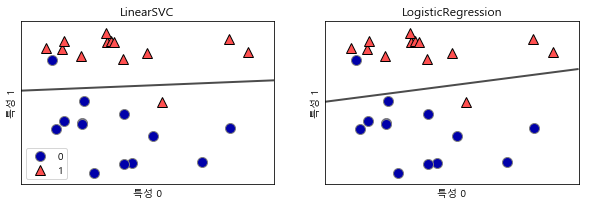

In [3]:
from sklearn.linear_model import LogisticRegression   # logistic regression
from sklearn.svm import LinearSVC   # linear svm classification

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression(solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

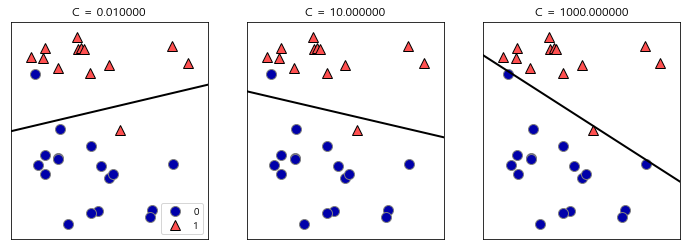

In [6]:
mglearn.plots.plot_linear_svc_regularization()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


In [11]:
# C: regularization 옵션
logreg100 = LogisticRegression(solver='liblinear', C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


In [12]:
logreg001 = LogisticRegression(solver='liblinear', C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


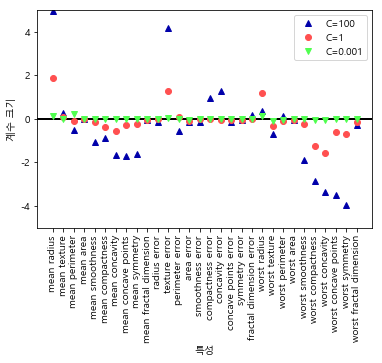

In [14]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)   # x축 값 넣기
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

`LogisticRegression`의 `max_iter` 매개변수 기본값은 100입니다. 사이킷런 0.20 버전에서 수렴에 도달하지 못했다는 경고 메세지를 피하기 위해 1000으로 증가시킵니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


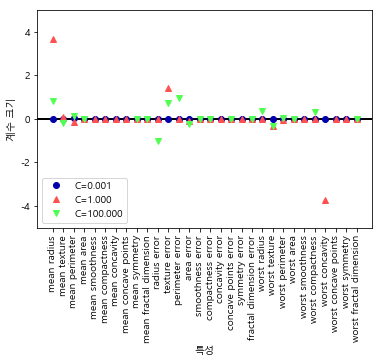

In [19]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

### 다중 클래스 분류를 위한 선형 모델

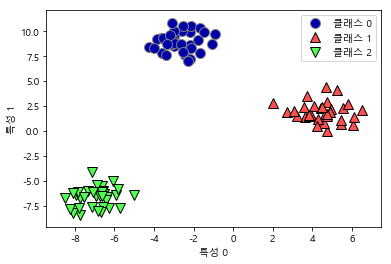

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show()

In [21]:
linear_svm = LinearSVC().fit(X, y)   # linear SVM fitting
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


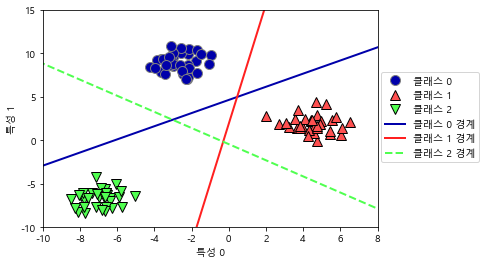

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.show()

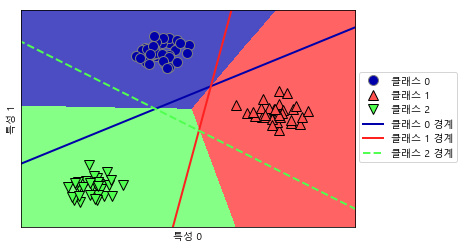

In [31]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

### scikit-learn의 장점
> model fit부터 predict까지 **한 줄**에 작성 가능!!

In [32]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [33]:
logreg = LogisticRegression(solver='liblinear')
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [34]:
# model fit과 predict를 한 줄로 쓸 수 있음
y_pred = LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test)